In [1]:
# =========================================
# 📌 1. Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve,
    precision_recall_curve
)

import warnings
warnings.filterwarnings("ignore")


In [2]:
# =========================================
# 📌 2. Load Dataset
# =========================================
df = pd.read_csv("aug_train.csv")   # ensure file in same folder
print("Shape:", df.shape)
df.head()


Shape: (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
# =========================================
# 📌 3. Info & Missing Values
# =========================================
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
# =========================================
# 📌 4. Descriptive Stats
# =========================================
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


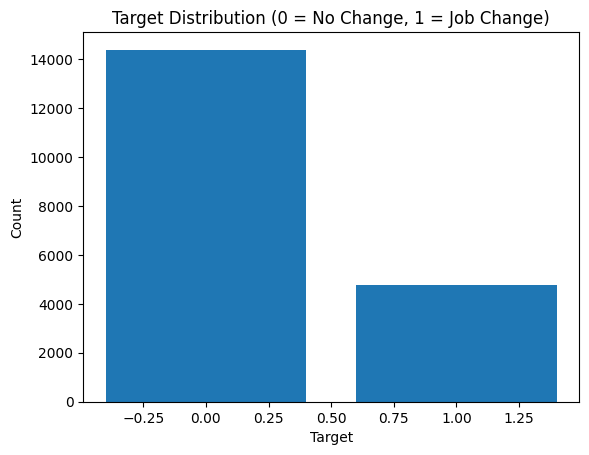

Job change %: 24.934753105752165


In [5]:
# =========================================
# 📌 5. Target Distribution
# =========================================
target_counts = df["target"].value_counts()
plt.figure()
plt.bar(target_counts.index, target_counts.values)
plt.title("Target Distribution (0 = No Change, 1 = Job Change)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

print("Job change %:", (target_counts[1]/len(df))*100)


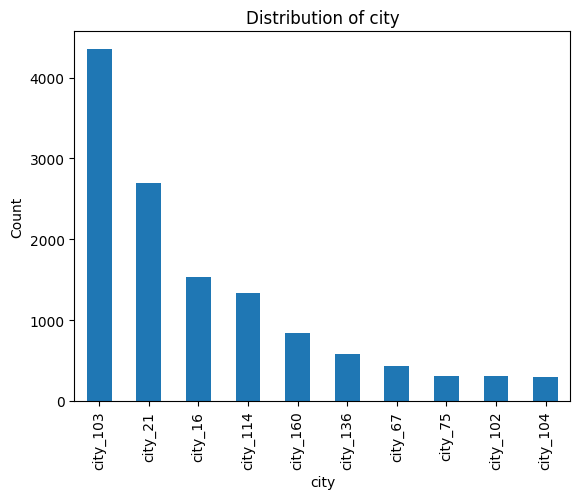

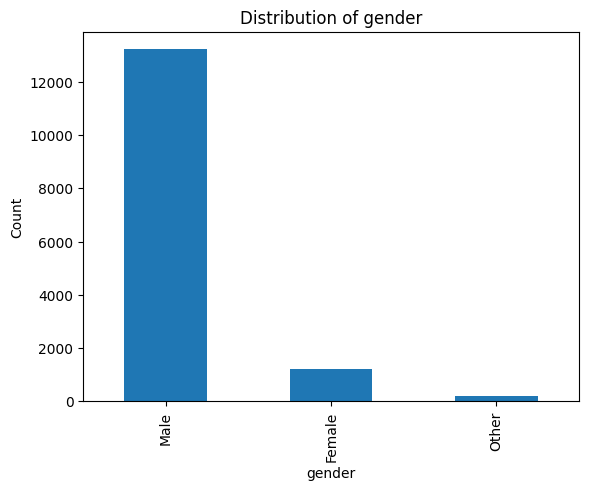

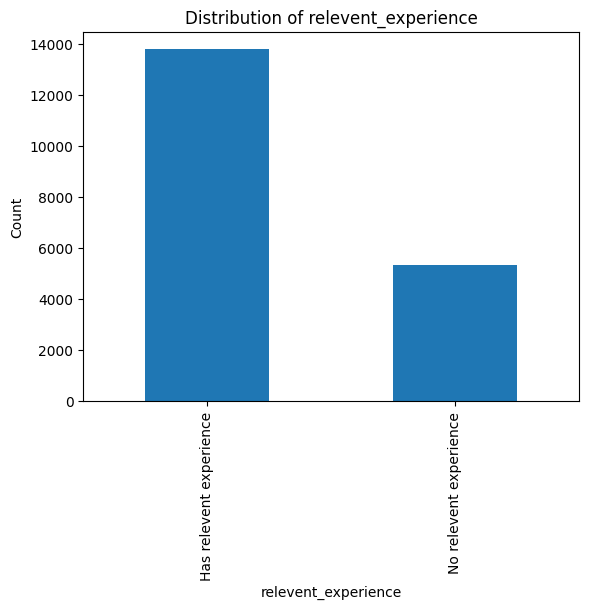

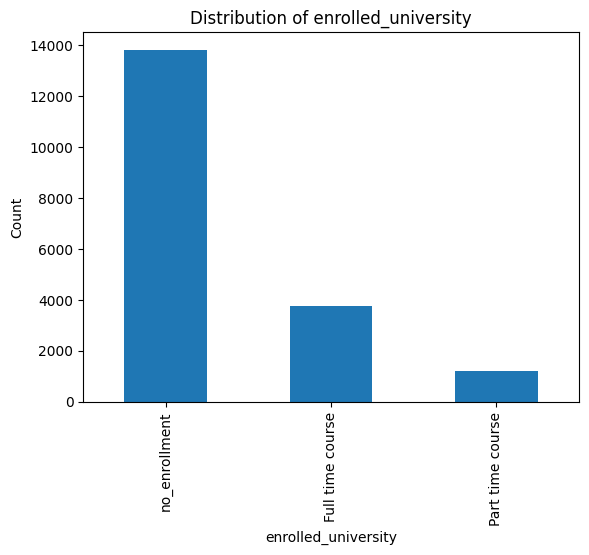

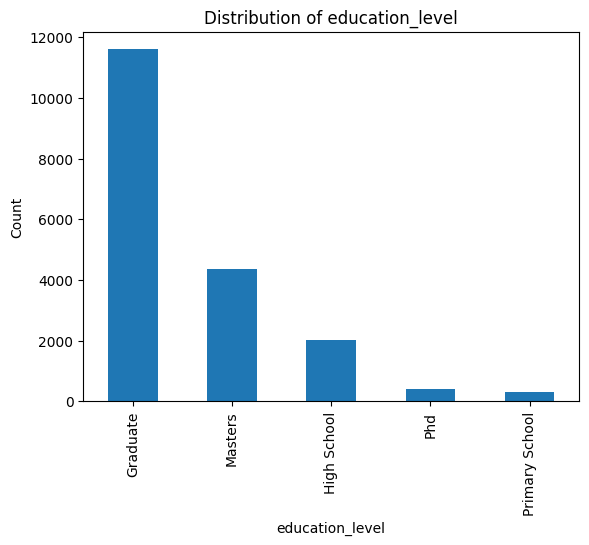

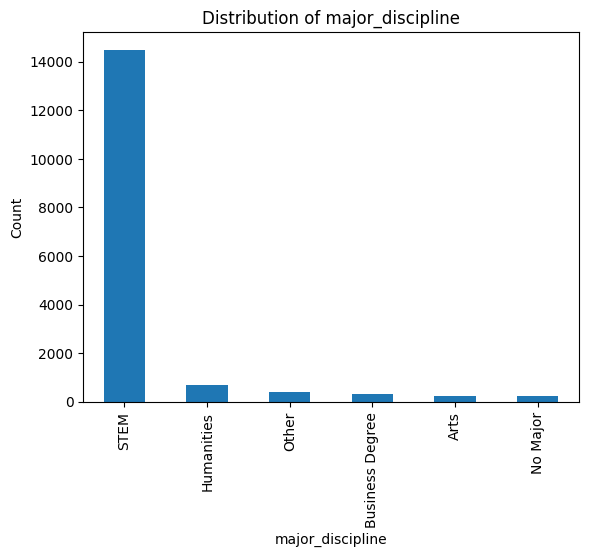

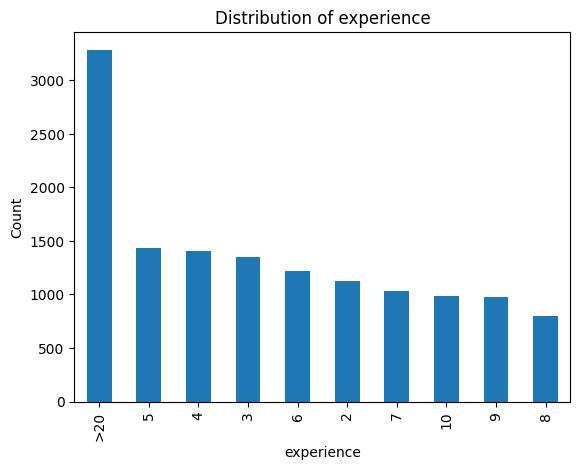

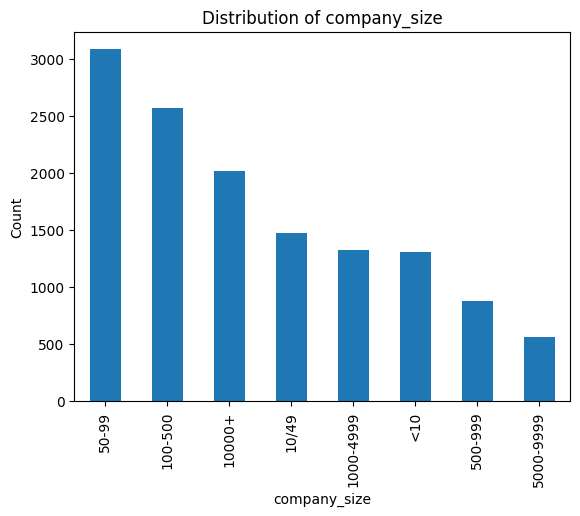

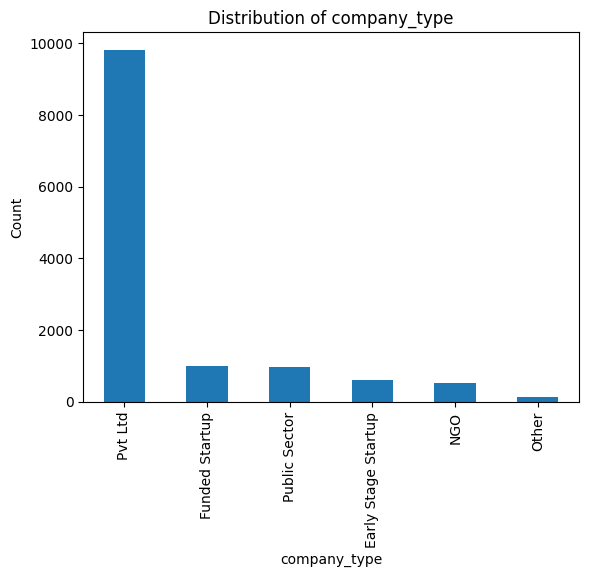

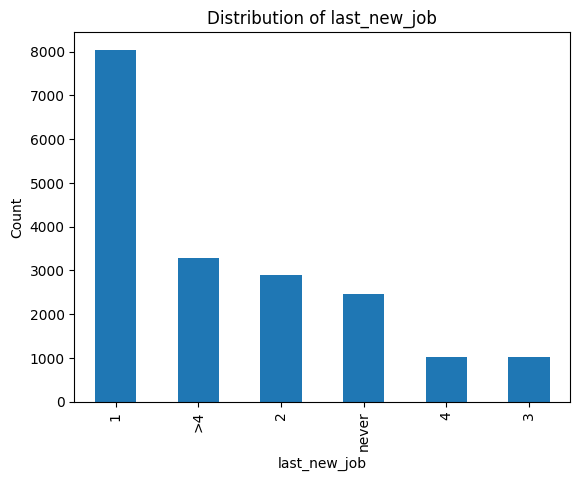

In [6]:
# =========================================
# 📌 6. Categorical Feature Distributions
# =========================================
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [7]:
# =========================================
# 📌 7. Encode Categorical Features
# =========================================
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)   # ensure str
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,3,0,5,21,8,6,0,36,1.0
1,29725,77,0.776,1,1,3,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,3,1,0,0,5,15,8,6,6,83,0.0
3,33241,14,0.789,3,1,2,0,1,20,8,5,6,52,1.0
4,666,50,0.767,1,0,3,2,5,21,4,1,3,8,0.0


In [8]:
# =========================================
# 📌 7. Encode Categorical Features
# =========================================
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)   # ensure str
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,3,0,5,21,8,6,0,36,1.0
1,29725,77,0.776,1,1,3,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,3,1,0,0,5,15,8,6,6,83,0.0
3,33241,14,0.789,3,1,2,0,1,20,8,5,6,52,1.0
4,666,50,0.767,1,0,3,2,5,21,4,1,3,8,0.0


In [9]:
# =========================================
# 📌 8. Train-Test Split
# =========================================
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      2877
         1.0       0.47      0.75      0.58       955

    accuracy                           0.73      3832
   macro avg       0.68      0.74      0.69      3832
weighted avg       0.79      0.73      0.74      3832

ROC-AUC: 0.7815070599646592


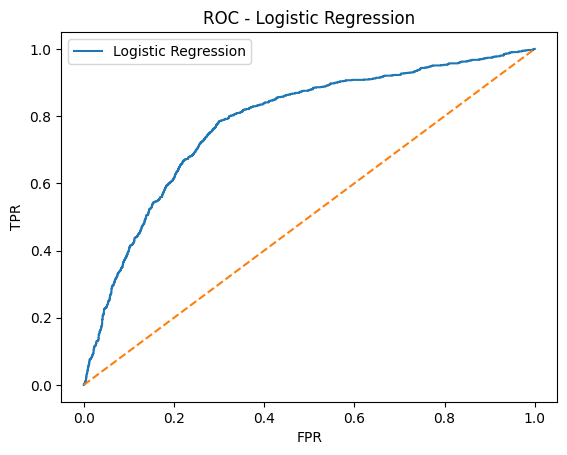

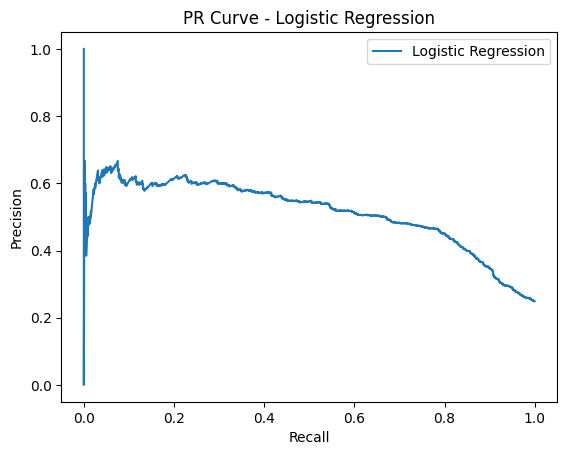

In [10]:
# =========================================
# 📌 9. Logistic Regression
# =========================================
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced")
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC - Logistic Regression")
plt.legend()
plt.show()

# PR Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob_log)
plt.figure()
plt.plot(rec, prec, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve - Logistic Regression")
plt.legend()
plt.show()


Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2877
         1.0       0.58      0.46      0.51       955

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.77      0.78      0.77      3832

ROC-AUC: 0.8063458700253135


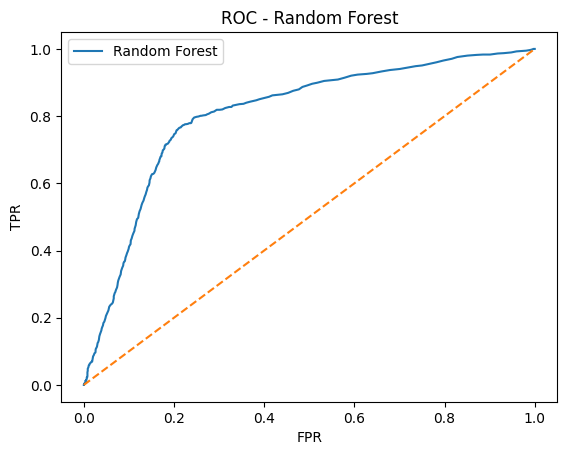

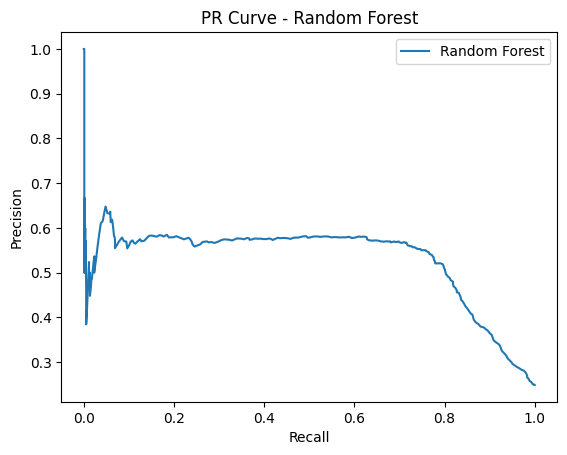

In [11]:
# =========================================
# 📌 10. Random Forest
# =========================================
rf = RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC - Random Forest")
plt.legend()
plt.show()

# PR Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(rec, prec, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve - Random Forest")
plt.legend()
plt.show()
